# Worldwide Autism Burden

In [10]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Importing data

In [2]:
prevalence_abs = pd.read_csv('prevalence_abs.csv').drop(['measure', 'metric', 'cause', 'upper', 'lower'], axis=1).rename({'val': 'prevalence_abs'}, axis=1)
prevalence_pct = pd.read_csv('prevalence_pct.csv').drop(['measure', 'metric', 'cause', 'upper', 'lower'], axis=1).rename({'val': 'prevalence_pct'}, axis=1)
prevalence_rate = pd.read_csv('prevalence_rate.csv').drop(['measure', 'metric', 'cause', 'upper', 'lower'], axis=1).rename({'val': 'prevalence_rate'}, axis=1)

In [3]:
prevalence_abs = prevalence_abs.reset_index().pivot(index=['location', 'age', 'year'], columns=['sex'], values='prevalence_abs').reset_index().rename({'Female': 'female', 'Male': 'male'}, axis=1)
prevalence_pct = prevalence_pct.reset_index().pivot(index=['location', 'age', 'year'], columns=['sex'], values='prevalence_pct').reset_index().rename({'Female': 'female', 'Male': 'male'}, axis=1)
prevalence_rate = prevalence_rate.reset_index().pivot(index=['location', 'age', 'year'], columns=['sex'], values='prevalence_rate').reset_index().rename({'Female': 'female', 'Male': 'male'}, axis=1)



### Cleaning data

In [4]:
prevalence_abs['age'] = prevalence_abs['age'].str.replace(' years', '')
prevalence_pct['age'] = prevalence_pct['age'].str.replace(' years', '')
prevalence_rate['age'] = prevalence_rate['age'].str.replace(' years', '')

### Exploratory Analysis

In [5]:
print(prevalence_abs.info())
print('===================')
print(prevalence_pct.info())
print('===================')
print(prevalence_pct.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73440 entries, 0 to 73439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  73440 non-null  object 
 1   age       73440 non-null  object 
 2   year      73440 non-null  int64  
 3   female    73440 non-null  float64
 4   male      73440 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73440 entries, 0 to 73439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  73440 non-null  object 
 1   age       73440 non-null  object 
 2   year      73440 non-null  int64  
 3   female    73440 non-null  float64
 4   male      73440 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73440 entries, 0 to 73439
Data columns (total 5 column

In [7]:
print(prevalence_abs.describe())
print('===================')
print(prevalence_pct.describe())
print('===================')
print(prevalence_rate.describe())

sex          year         female           male
count  73440.0000   73440.000000   73440.000000
mean    2004.5000    2318.182692    7615.360813
std        8.6555   10229.680327   34717.050722
min     1990.0000       0.003581       0.025593
25%     1997.0000      43.076774     132.323683
50%     2004.5000     312.119194     931.645277
75%     2012.0000    1213.167506    3725.540906
max     2019.0000  249559.034494  802273.112472
sex          year        female          male
count  73440.0000  73440.000000  73440.000000
mean    2004.5000      0.001713      0.005700
std        8.6555      0.000458      0.002175
min     1990.0000      0.000524      0.002304
25%     1997.0000      0.001387      0.004316
50%     2004.5000      0.001680      0.005129
75%     2012.0000      0.001987      0.006364
max     2019.0000      0.004384      0.022509
sex          year        female          male
count  73440.0000  73440.000000  73440.000000
mean    2004.5000    167.527664    543.171529
std        8.655

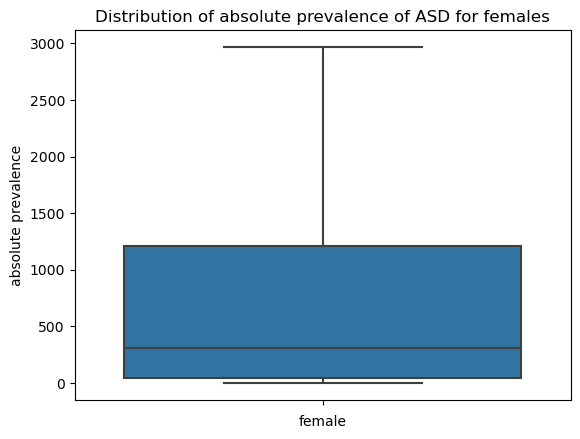

In [27]:
sns.boxplot(data=prevalence_abs, y='female', sym='')
plt.title('Distribution of absolute prevalence of ASD for females')
plt.xlabel('female')
plt.ylabel('absolute prevalence')
plt.show()

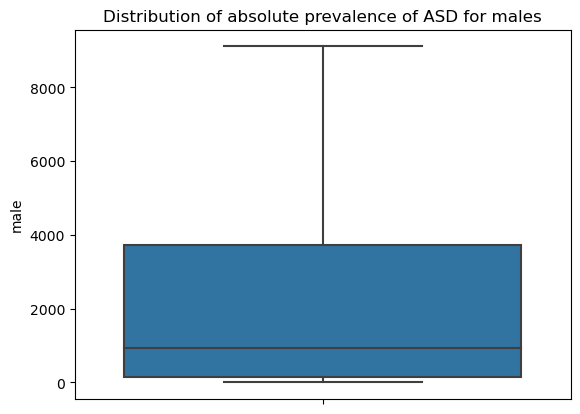

In [24]:
sns.boxplot(data=prevalence_abs, y='male', sym='')
plt.title('Distribution of absolute prevalence of ASD for males')
plt.xlabel('male')
plt.ylabel('absolute prevalence')
plt.show()

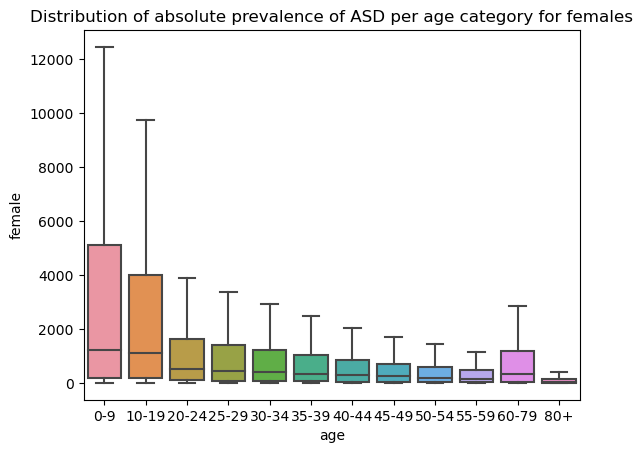

In [25]:
sns.boxplot(data=prevalence_abs, y='female', x='age', sym='')
plt.title('Distribution of absolute prevalence of ASD per age category for females')
plt.xlabel('female')
plt.ylabel('absolute prevalence')
plt.show()

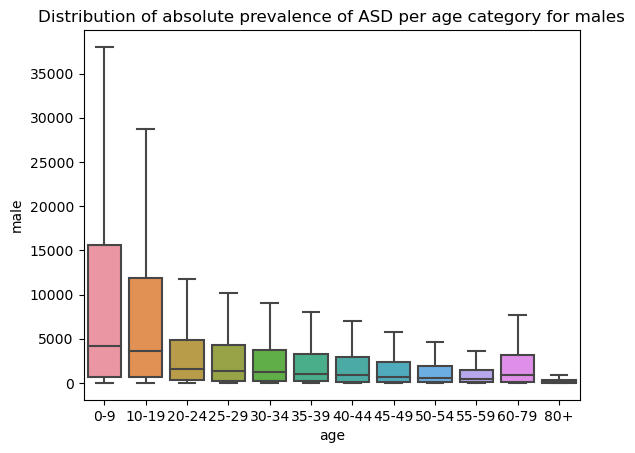

In [26]:
sns.boxplot(data=prevalence_abs, y='male', x='age', sym='')
plt.title('Distribution of absolute prevalence of ASD per age category for males')
plt.xlabel('male')
plt.ylabel('absolute prevalence')
plt.show()

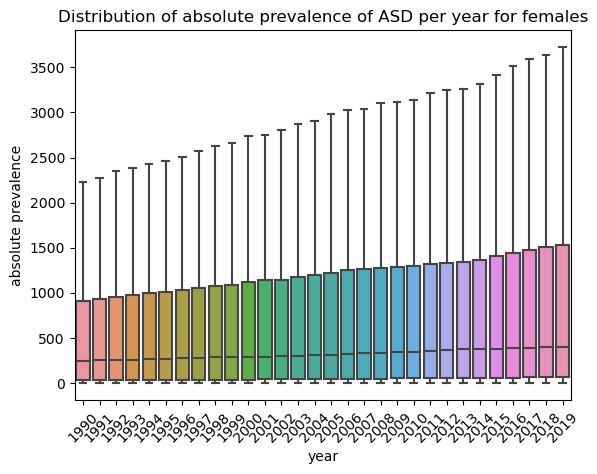

In [30]:
sns.boxplot(data=prevalence_abs, y='female', x='year', sym='')
plt.title('Distribution of absolute prevalence of ASD per year for females')
plt.xlabel('year')
plt.xticks(rotation=45)
plt.ylabel('absolute prevalence')
plt.show()

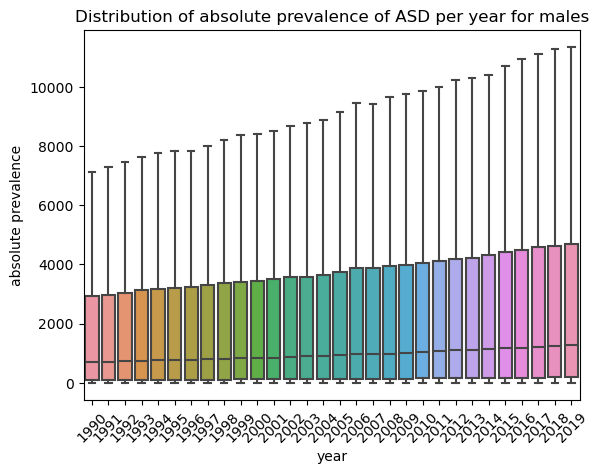

In [29]:
sns.boxplot(data=prevalence_abs, y='male', x='year', sym='')
plt.title('Distribution of absolute prevalence of ASD per year for males')
plt.xlabel('year')
plt.xticks(rotation=45)
plt.ylabel('absolute prevalence')
plt.show()

In [38]:
total_abs = prevalence_abs[prevalence_abs['year'] == 2019].groupby(['location']).agg({'female': 'sum', 'male': 'sum'}).reset_index()
total_abs['sex_ratio'] = total_abs['male'] / total_abs['female']

total_abs_lowest = total_abs.sort_values('sex_ratio').head(10)


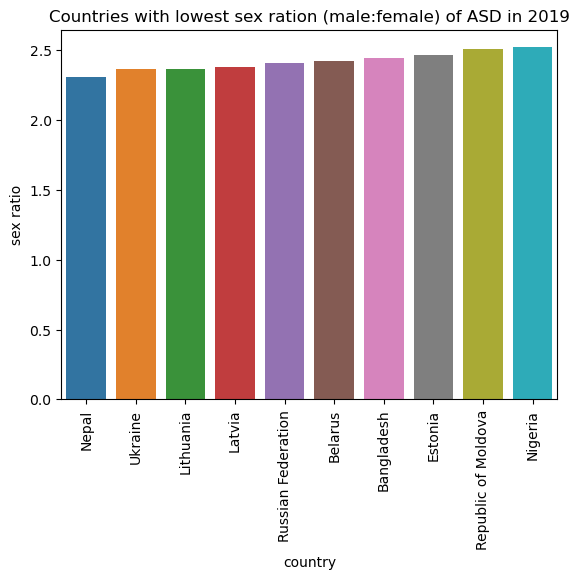

In [41]:
sns.barplot(data=total_abs_lowest, x='location', y='sex_ratio')
plt.title('Countries with lowest sex ration (male:female) of ASD in 2019')
plt.xlabel('country')
plt.xticks(rotation=90)
plt.ylabel('sex ratio')
plt.show()

In [40]:
total_abs_highest = total_abs.sort_values('sex_ratio', ascending=False).head(10)

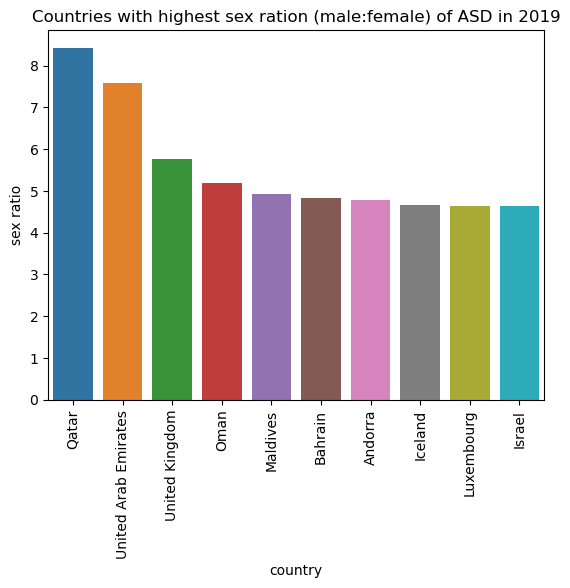

In [42]:
sns.barplot(data=total_abs_highest, x='location', y='sex_ratio')
plt.title('Countries with highest sex ration (male:female) of ASD in 2019')
plt.xlabel('country')
plt.xticks(rotation=90)
plt.ylabel('sex ratio')
plt.show()